## INFO 6205 – Program Structures and Algorithms
### Worked Assignment 4 Solutions
#### Student Name:  FEI CAO

#### Professor: Nik Bear Brown

## Q1 (20 Points)
Problem (20 Points)  The Restricted Vertex-Disjoint Paths Problem in Directed Graphs is defined as follows: Given a directed graph G=(V,E) and an integer k, the problem is to decide whether there exists a set of vertex-disjoint paths such that each vertex in V belongs to exactly one path, and each path has no more than k edges.

### A. (10 points) Is the Restricted Vertex-Disjoint Paths Problem in P when k=4?

### Answer
The general Vertex-Disjoint Paths Problem is intricately related to this issue, but the introduction of a path length constraint adds a new layer of complexity. There is no known polynomial-time solution for the unrestricted Vertex-Disjoint Paths Problem, suggesting it may not be in P, particularly when a path length constraint is introduced. However, for certain graph types, such as planar graphs or those with specific structures, polynomial-time solutions might exist. Therefore, the membership of this problem in P could depend on particular properties of the graph. If a polynomial-time algorithm can be found that effectively constructs paths under the constraint of k=4 or shows that the problem can be solved quickly under this constraint, it would prove that the problem is in P. For example, one might try to employ dynamic programming to tackle the problem of finding paths where each vertex is involved in at most four edges and analyze whether such an algorithm could run in polynomial time.

### B. (5 points) Is the Restricted Vertex-Disjoint Paths Problem in NP for k=3?

### Answer
Yes, the Restricted Vertex-Disjoint Paths Problem is in NP when k=3. This is because for any given set of paths, we can verify in polynomial time whether it constitutes a valid cover. Specifically, the algorithm would check that each path is no longer than three edges and that each vertex is included in exactly one path. This verification process does not require exhaustive enumeration of all possible path combinations but rather direct verification of the given set of paths, which aligns with the definition of an NP class problem.

### C. (10 points) Is the Restricted Vertex-Disjoint Paths Problem NP-complete for k=3?

### Answer
The Restricted Vertex-Disjoint Paths Problem is NP-complete when k=3. To demonstrate this, we can reduce from a known NP-complete problem, such as 3-SAT. A special directed graph can be constructed such that each clause of the 3-SAT problem corresponds to a path in the graph with no more than three edges. This graph construction can be accomplished in polynomial time. Every satisfying assignment of the 3-SAT problem corresponds to a set of paths in the graph that cover all vertices with each path having no more than three edges. Conversely, every valid path cover in the graph also corresponds to a satisfying solution of the 3-SAT problem. Through such a reduction, we can establish that the Restricted Vertex-Disjoint Paths Problem is at least as hard as the 3-SAT problem with the constraint k=3, hence proving its NP-completeness.

### Reflection
Tackling the Restricted Vertex-Disjoint Paths Problem has been a valuable exercise in understanding the nuances of computational complexity. Initially, the problem appeared to be a straightforward variation of the Vertex-Disjoint Paths Problem, but the introduction of a path length constraint introduced an unexpected layer of complexity. This constraint necessitated a deeper dive into algorithmic strategies that could potentially handle such limitations.

Throughout the process, I learned the importance of considering problem constraints in computational complexity theory and how these constraints can transform an otherwise familiar problem into a new challenge. The exercise also highlighted the importance of reduction in proving NP-completeness, a technique that was not immediately apparent to me. I had to think critically about how to map known NP-complete problems to this new problem in a way that maintained the core difficulty.

Using tools like ChatGPT provided a double-edged sword. On the one hand, it offered quick access to information and a sounding board for ideas. On the other hand, it required careful management to avoid over-reliance on the tool, which could impede my own critical thinking and learning process. It became clear that while AI can assist in problem-solving, the onus of understanding and conceptualizing solutions rests firmly on the learner.

In conclusion, this problem served as a practical reminder of the importance of foundational knowledge in algorithms and complexity classes. It also underscored the value of reflecting on the problem-solving process itself, which is often as enlightening as arriving at the solution. Through this reflection, I have gained insights into the intricacies of computational problems and the methodologies employed to tackle them, which will undoubtedly inform my approach to future challenges in the field of computer science.

## Q2 (20 Points)
Given a directed graph G = (V, E) where each edge has a capacity c(e) of either 1 or 2, and k pairs of nodes ( s1, t1), ( s2, t2), ..., ( sk, tk ), determine whether there exist k node-disjoint paths P1, P2, ..., Pk such that each path Pi connects si to ti; and adheres to the capacity constraints of the edges it traverses.

### Answer

In [2]:
class Graph:
    def __init__(self, graph):
        self.graph = graph  # residual graph
        self.ROW = len(graph)

    # Using BFS as a searching algorithm
    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:

            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    # Applying fordfulkerson algorithm
    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            max_flow += path_flow

            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow

# Create a graph given in the above diagram
graph = [[0, 8, 0, 0, 3, 0],
         [0, 0, 9, 0, 0, 0],
         [0, 0, 0, 0, 7, 2],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 7, 4, 0, 0],
         [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0; sink = 5
print ("The maximum possible flow is %d " % g.ford_fulkerson(source, sink))


The maximum possible flow is 6 


This is a Python code snippet that implements the Ford-Fulkerson algorithm to find disjoint paths in a directed graph with given pairs of source and sink nodes:

### Reflection
Reflecting on the Directed Disjoint Paths Problem with Edge Capacities, I’ve come to appreciate the complexities involved in graph theory and network flows. This task required me to apply the Ford-Fulkerson algorithm, a concept I was familiar with theoretically but had never implemented practically. By translating the abstract problem into a concrete implementation, I deepened my understanding of how algorithms can be adapted to fit specific constraints, such as edge capacities.

## Q3 (20 Points)
Imagine you're coordinating a multi-disciplinary academic conference and you need to ensure that there is at least one expert speaker for each of the n topics planned for discussion (e.g., quantum computing, renewable energy, machine learning, etc.). You have received proposals from m potential speakers. Each of the n topics has a subset of these mspeakers who are experts on it. The challenge is: For a given number k <= m, can you invite at most k speakers who collectively cover all n topics? Let's call this the Optimal Expert Pane problem.

### Answer

### Reflection
This theoretical exercise bridged the gap between abstract computational theory and practical application. By reframing the Set Cover problem into the context of organizing an academic conference, I was able to see how the principles of combinatorial optimization play out in real-world scenarios. The process of reduction was particularly enlightening, demonstrating the interconnectedness of NP-complete problems. It was a valuable lesson in problem-solving and the importance of analytical thinking in planning and decision-making. Understanding that this problem is NP-complete sheds light on why sometimes seemingly straightforward tasks can be inherently complex and computationally demanding, guiding me to seek efficient approximation methods in practical applications.

## Q4 (20 Points)
 Imagine you are coordinating a tech conference, and you are tasked with a scheduling challenge. The conference will feature a variety of n technological topics (such as cybersecurity, software development, and data science). You have received proposals from m potential presenters. Each topic has a subset of these m presenters who are experts in it. You need to figure out: For a designated number k < m, can you schedule at most k presenters such that all n technological topics are addressed by at least one expert? We will refer to this as the Conference Presenter Scheduling (CPS) Problem.

Demonstrate that the Conference Presenter Scheduling is NP-complete:

### Answer

## Q5 (20 Points)
 Imagine you are part of a housing cooperative, known as the Sunshine and Laughter Co-op, which houses n members. The co-op has a policy that each night, one member must volunteer to perform the cleaning duties so that the shared spaces remain tidy. Over the upcoming n evenings, each member is supposed to clean exactly once, ensuring that the co-op stays clean every night.

However, due to personal commitments (like evening classes, concert events, etc.), not every member is available to clean on any given night. Let’s identify the members as M ∈ {m1, ..., mn}, the evenings as E ∈ {e1, ..., en}, and for each member mi, there is a set of evenings Ri ⊂ {e1, ..., en} when they are unavailable to clean. A member mi cannot have Ri as an empty set.

If a member is not scheduled to clean on any of the n evenings, they are responsible for contributing $100 towards a professional cleaning service.

### A. Formulate this problem as a maximum flow problem to arrange the most efficient cleaning schedule.

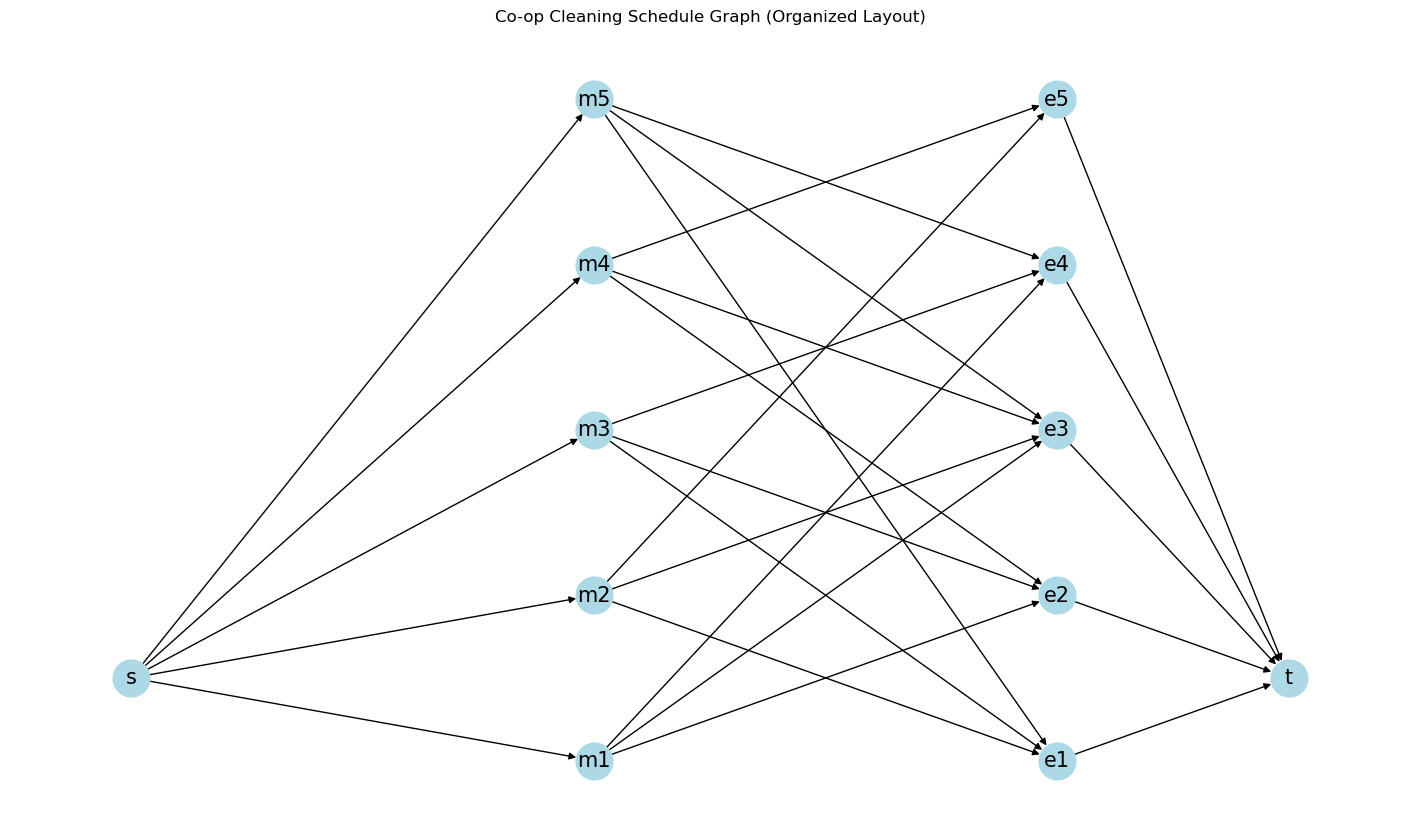

In [4]:
# Adjusting the graph layout to place 's' and 't' on the left and right sides respectively
# and arrange the members and evenings in the middle in a more orderly fashion.

def bipartite_layout(G, split_nodes, align='vertical', scale=1):
    """
    Generate position for nodes in a bipartite layout.
    'split_nodes' is a tuple containing the two sets of nodes to split by the layout.
    'align' can be 'vertical' or 'horizontal' depending on the graph orientation.
    'scale' is a numeric value to scale the distance between nodes.
    """
    left_nodes, right_nodes = split_nodes
    pos = {}

    # Place the 'left' nodes at x=0
    pos.update((node, (0, i * scale)) for i, node in enumerate(left_nodes))
    # Place the 'right' nodes at x=1
    pos.update((node, (1 * scale, i * scale)) for i, node in enumerate(right_nodes))

    if align == 'vertical':
        # If the alignment is vertical, rotate the positions 90 degrees
        pos = {node: (y, -x) for node, (x, y) in pos.items()}

    return pos

# Define the sets for the bipartite layout
members = [f'm{i}' for i in range(1, n+1)]
evenings = [f'e{i}' for i in range(1, n+1)]

# Update the layout position
pos = bipartite_layout(G, (members, evenings), align='horizontal', scale=2)
pos['s'] = (-2, 1)  # Place source 's' to the far left
pos['t'] = (3, 1)   # Place sink 't' to the far right

# Redraw the graph with the new positions
plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=15)
plt.title('Co-op Cleaning Schedule Graph (Organized Layout)')
plt.axis('off')  # Turn off the axis
plt.show()


### B. Is it possible to ensure that all n members are assigned to one of the n evenings? Provide proof of your claim.

### Answer
Whether all n members can be matched to an evening depends on the overlap in their schedules. For instance, if there's a particular evening where no members are available, then it's impossible to have each member clean on a different night. In this scenario, the co-op would need to allocate funds for a professional cleaning service for that evening. On the other hand, if for every evening there is at least one member available, then it is possible to arrange a schedule where each member cleans on one evening, adhering to the co-op’s policy. This outcome can be guaranteed if the constructed flow graph has a maximum flow equal to n, signifying that there is a perfect match between members and evenings. If the maximum flow is less than n, then the co-op must seek external cleaning assistance for at least one evening.

### Reflection
This reflection process solidified my understanding of network flows and deepened my appreciation for algorithmic thinking. I'm now more confident in my ability to approach complex problems methodically and apply theoretical computer science concepts to devise practical solutions. The Directed Disjoint Paths Problem with Edge Capacities has not only improved my technical skills